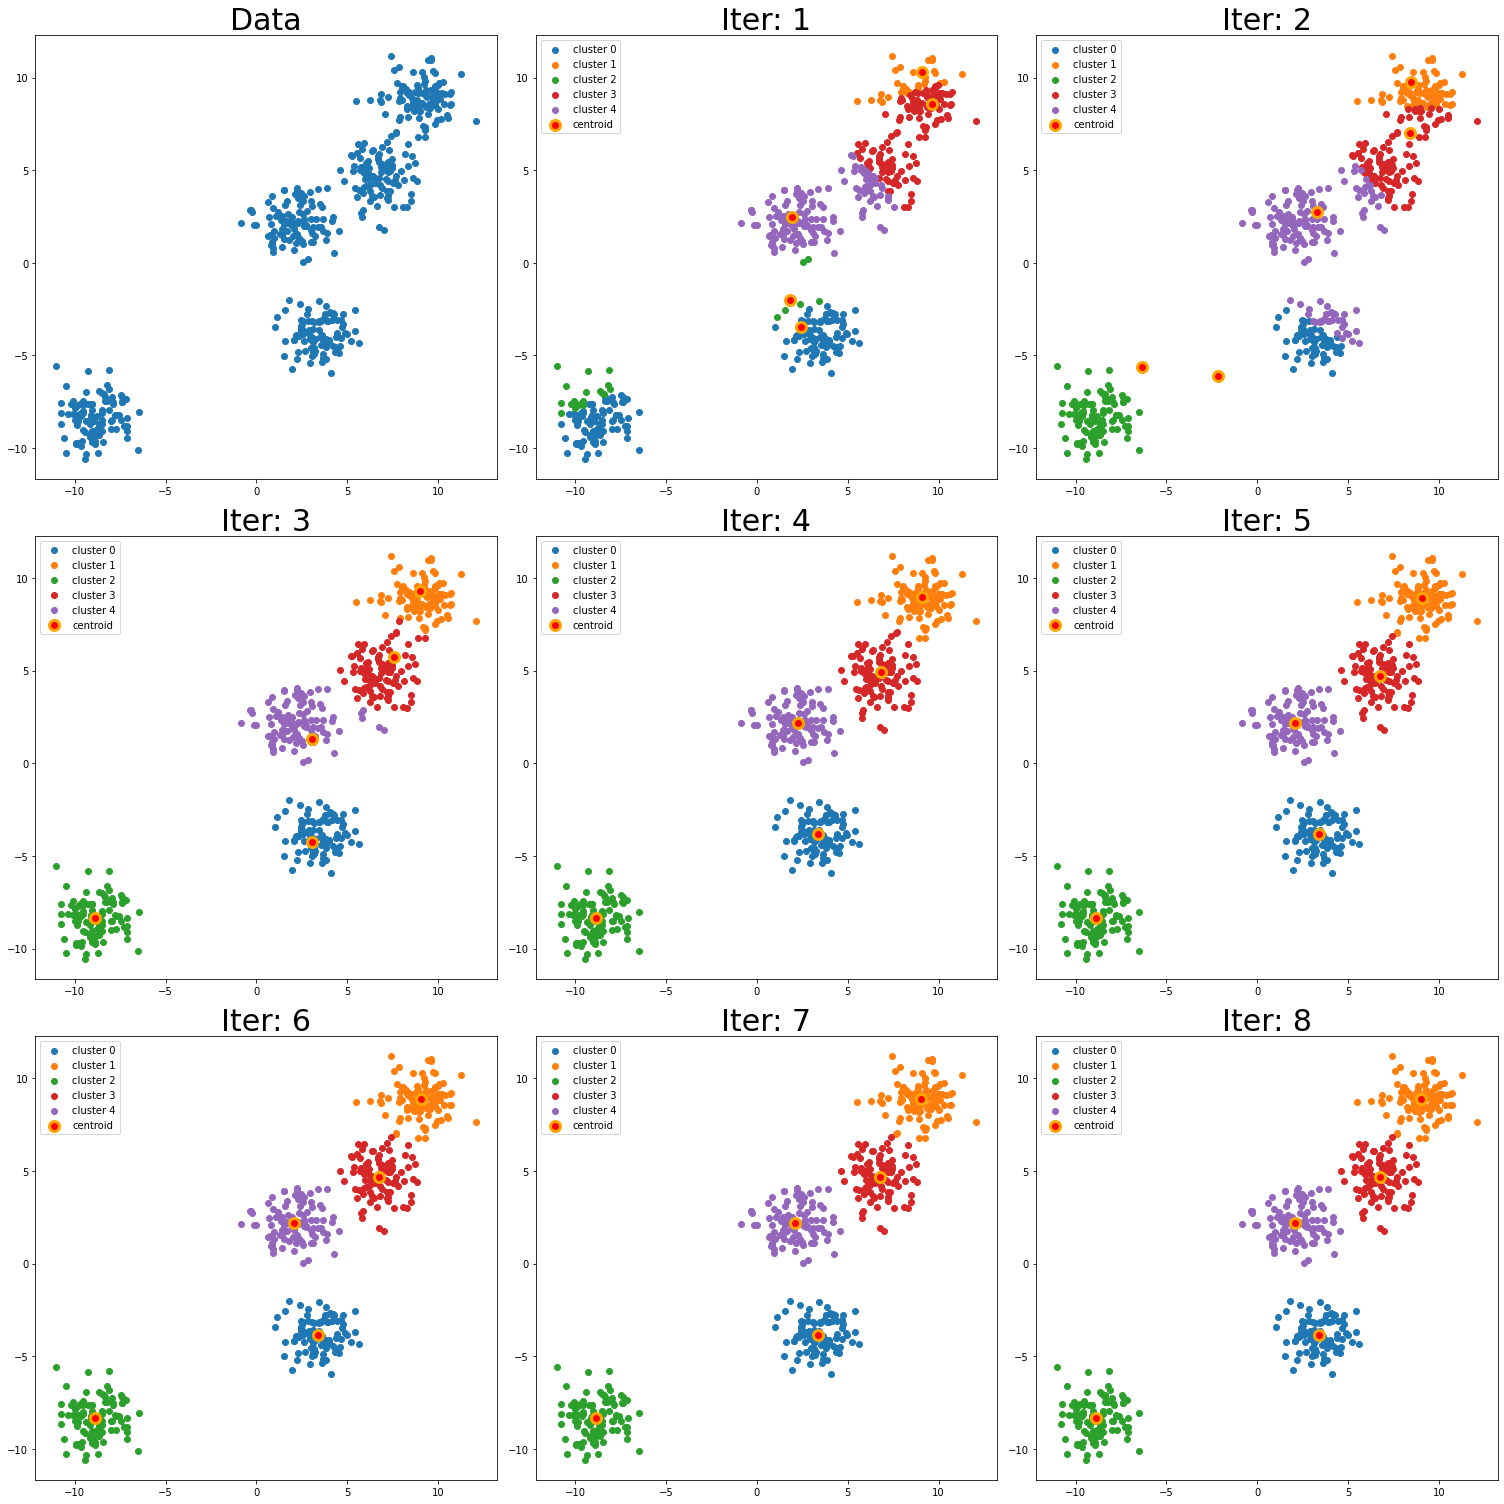

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(2)

# --- fig setting
fig = plt.figure(figsize=(21,21))
axes = np.empty(shape=(0,))
for row_idx in range(3):
    for col_idx in range(3):
        axes = np.append(axes, fig.add_subplot(3,3,row_idx*3 + col_idx + 1))
# ---

# --- set toy dataset's parameters
K = 5
n_iter = 8
# ---

# --- Data Generation 
n_cluster, n_data = K, 100

centers = []
for _ in range(n_cluster):
    centers.append([random.uniform(-10, 10) for _ in range(2)])

x_data = []
for cluster_idx in range(n_cluster):
    center = centers[cluster_idx]

    cluster_x_data = []
    for _ in range(n_data):
        x1 = center[0] + random.gauss(0,1)
        x2 = center[1] + random.gauss(0,1)
        cluster_x_data.append([x1,x2])
    x_data += cluster_x_data

x1_data = [x[0] for x in x_data]
x2_data = [x[1] for x in x_data]
axes[0].scatter(x1_data,x2_data)
axes[0].set_title('Data',fontsize=30)
# ---

# --- Random Choice of Centroids
random_indices = []
centroids = []
for _ in range(10000):
    random_idx = random.randint(0, n_data*n_cluster - 1)
    if random_idx not in random_indices:
        random_indices.append(random_idx)
        centroids.append(x_data[random_idx])
    
    if len(centroids) == K:
        break
# ---

# --- Clustering + Centroid Update iteration
for iter_idx in range(n_iter):
    # --- Clustering
    clusters = [[] for _ in range(K)]
    for X in x_data:
        distances = []
        for centroid in centroids:
            distance = ((X[0] - centroid[0])**2 + (X[1] - centroid[1])**2)**0.5
            distances.append(distance)
    
        m, m_idx = None, 0
        for dist_idx, distance in enumerate(distances):
            if m == None or distance < m:
                m = distance
                m_idx = dist_idx
        clusters[m_idx].append(X)
    # ---
    
    # --- Clustering Visualization
    for cluster_idx in range(K):
        cluster = clusters[cluster_idx]
        x1_data = [x[0] for x in cluster]
        x2_data = [x[1] for x in cluster]
        axes[iter_idx+1].scatter(x1_data, x2_data,label=f'cluster {cluster_idx}')
    
    x1_centroids = [x[0] for x in centroids]
    x2_centroids = [x[1] for x in centroids]
    axes[iter_idx+1].scatter(x1_centroids,x2_centroids,color='r',edgecolor='orange',s=100,linewidth=3,label='centroid')
    axes[iter_idx+1].set_title(f'Iter: {iter_idx + 1}',fontsize=30)
    axes[iter_idx+1].legend()
    # ---
    
    # --- Centroid Update
    centroids = []
    for cluster in clusters:
        x1_sum, x2_sum = 0, 0
        for x1,x2 in cluster:
            x1_sum += x1
            x2_sum += x2
        x1_center = x1_sum / len(cluster)
        x2_center = x2_sum / len(cluster)
        centroids.append([x1_center, x2_center])
    # ---
# ---
fig.tight_layout()